https://www.kaggle.com/datasets/sdolezel/black-friday

Aim of the dataset is to predit purchase amount of customer against various products

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import Train dataset
df_train = pd.read_csv('train.csv')
df_train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
df_train.shape

(550068, 12)

# Nan_values

In [5]:
nan_value = [value for value in df_train.columns if df_train[value].isnull().sum()>0]
nan_value

['Product_Category_2', 'Product_Category_3']

In [6]:
for value in nan_value:
    print('{} has {} nan value'.format(value,df_train[value].isnull().sum()))

Product_Category_2 has 173638 nan value
Product_Category_3 has 383247 nan value


# There are large number of missing values, lets check how missing values are effecting Purchase price

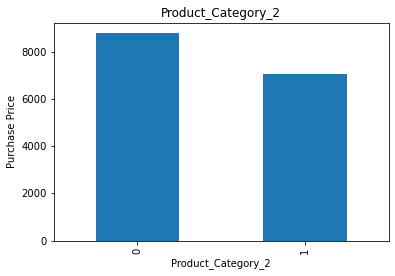

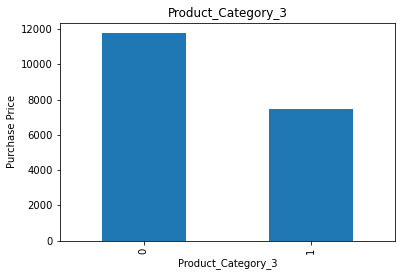

In [7]:
for value in  nan_value:
    data = df_train.copy()
    
    data[value] = np.where(data[value].isnull(),1,0)
    
    data.groupby(value)['Purchase'].median().plot.bar()
    plt.xlabel(value)
    plt.ylabel('Purchase Price')
    plt.title(value)
    plt.show()

In [8]:
# As here we can see that there is a relation between NaN and the purchase value so we need to replace NaN values

In our data set there are Numerical as well as Categorical values so lets check the columns and the relation with Purchase

# Numerical_values

In [9]:
numerical_value = [value for value in df_train.columns if df_train[value].dtypes != "O"]
numerical_value

print("Total features with numerical values :",len(numerical_value))

Total features with numerical values : 7


In our data set we can see that numerical values are in Discrete From so lets check the relation between Purchase with different columns with the help of Bar Graph

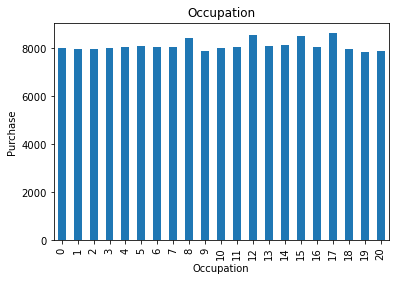

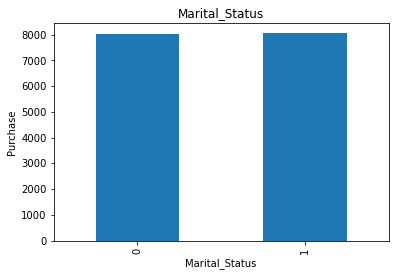

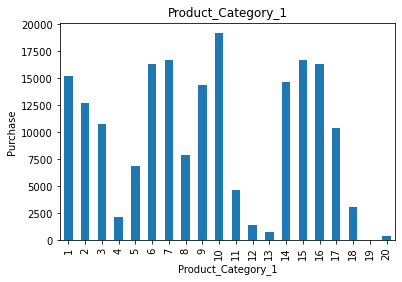

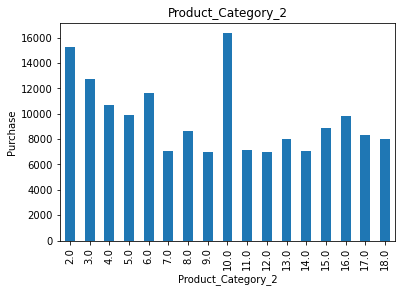

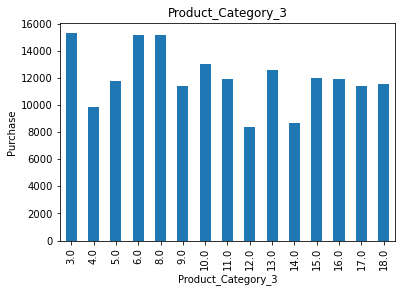

In [10]:
for value in numerical_value:
    if value == 'User_ID' or value == 'Purchase':
        pass
    else:
        data=df_train.copy()
        data.groupby(value)['Purchase'].median().plot.bar()
        plt.xlabel(value)
        plt.ylabel('Purchase')
        plt.title(value)
        plt.show()


# Categorical_value

In [11]:
categorical_value = [value for value in df_train.columns if value not in  numerical_value]
categorical_value

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [12]:
for value in categorical_value:
    print('{} has {} categorical values'.format(value,len(df_train[value].unique())))

Product_ID has 3631 categorical values
Gender has 2 categorical values
Age has 7 categorical values
City_Category has 3 categorical values
Stay_In_Current_City_Years has 5 categorical values


 There are no Nan value in Categorical feature so lets directly check thier relation with Purchase

# Relation between categorical and Purchase feature

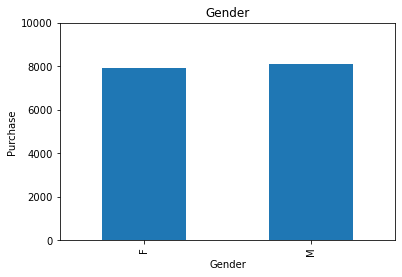

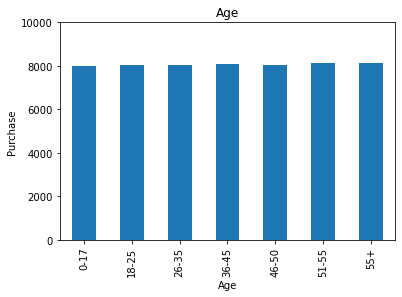

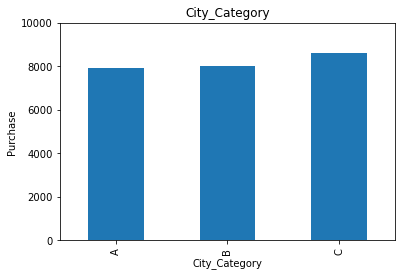

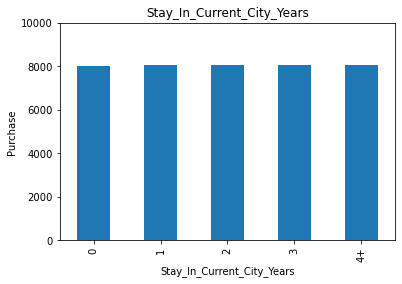

In [13]:
for value in categorical_value:
    data  = df_train.copy()
    if value == 'Product_ID':
        pass
    else:
        data.groupby(value)['Purchase'].median().plot.bar()
        plt.ylim(ymin = 0, ymax= 10000)
        plt.xlabel(value)
        plt.ylabel('Purchase')
        plt.title(value)
        plt.show()

C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

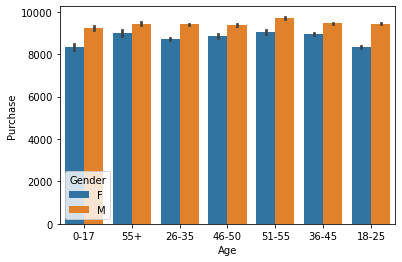

In [14]:
# Age Vs  Purchase according to Gender
# hue parameter take column name for colour encoding
sns.barplot('Age','Purchase',hue = 'Gender',data = data)
# Here we can see that Purchase of male is higher than female according to their Age

C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

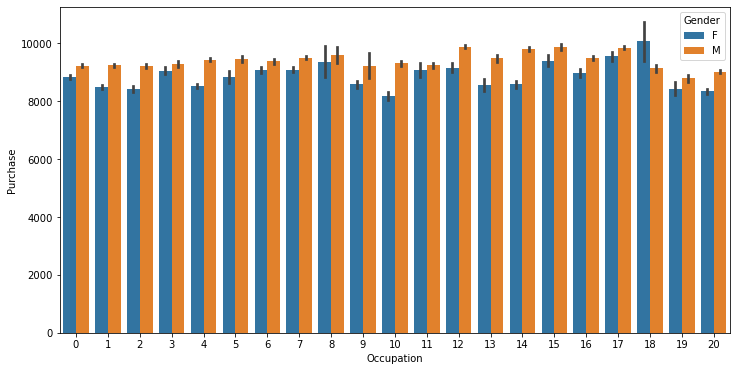

In [15]:
# Age Vs Occupation with respest to Gender
# rcParams sets the size of a graph with respect to width and height
plt.rcParams['figure.figsize'] = (12,6)
sns.barplot('Occupation','Purchase',hue = 'Gender',data = data)
# Here we can see that Purchase of male is slightly higher than female according to their Occupation in most of the cases

C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

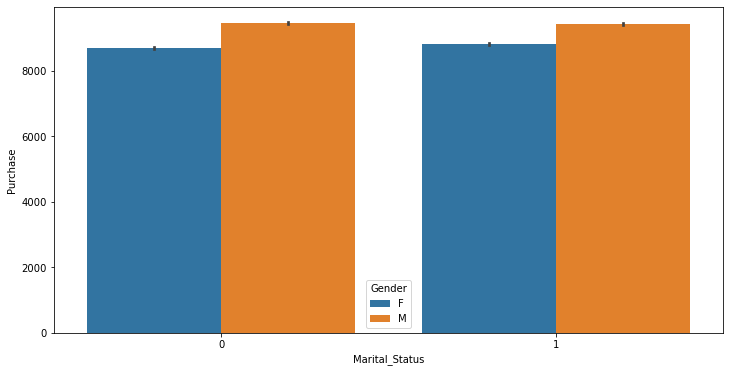

In [16]:
sns.barplot('Marital_Status','Purchase',hue = 'Gender',data = data)
# Here we can see that Purchase of male is almost higher than female according to their Maratial Status

C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

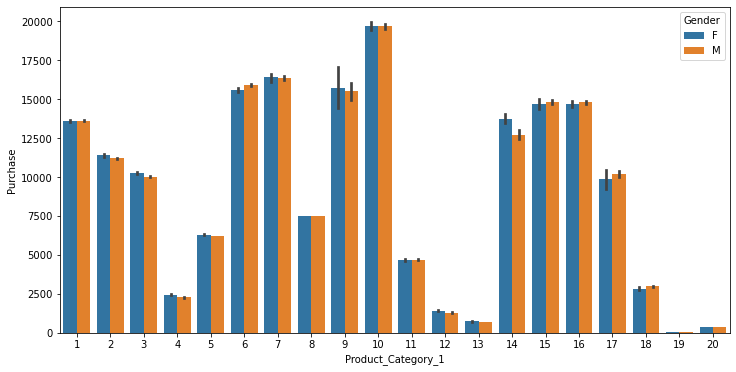

In [17]:
sns.barplot('Product_Category_1','Purchase',hue = 'Gender',data = data)
# Here we can see that Purchase of male is almost equal to female according to 1st Product Category

C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

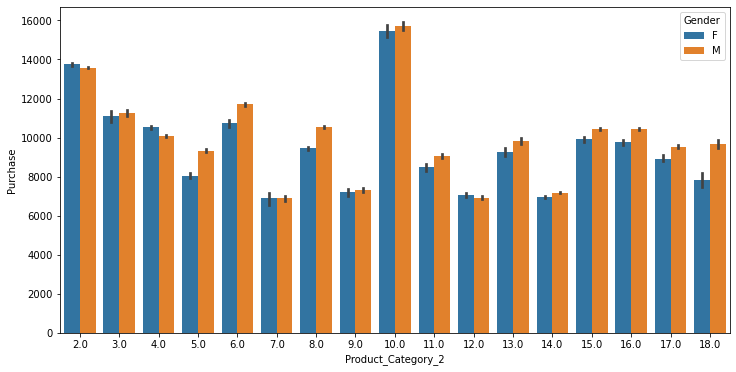

In [18]:
sns.barplot('Product_Category_2','Purchase',hue = 'Gender',data = data)
# Here we can see that Purchase of male is almost equal to female according to 2nd Product Category

C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

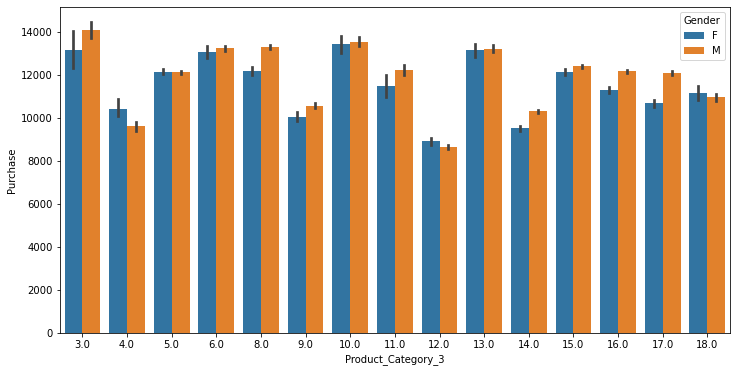

In [19]:
sns.barplot('Product_Category_3','Purchase',hue = 'Gender',data = data)
# Here we can see that Purchase of male is slightly higer than female  in some categories according to 3rd Product Category

# FEATURE ENGINEERING

# We have a test dataset so lets import our testing dataset to do some Feature Engineering

If we have train and the test Dataset we should always combine them  so we can do Data-Preprocessing on both the data

In [20]:
# Import Testing Data
df_test = pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [21]:
df_test.shape

(233599, 11)

In [22]:
## Merge both train and test dataset
data = df_train.append(df_test)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [23]:
data.shape

(783667, 12)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [25]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [26]:
# User ID is not import feature for our dataset so lets drop that feature 
data.drop('User_ID',axis = 1,inplace = True)

In [27]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [28]:
# TO check the Unique values Present in categorical feature
for value in categorical_value:
    print('{} has {} categorical values'.format(value,df_train[value].unique()))

Product_ID has ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853'] categorical values
Gender has ['F' 'M'] categorical values
Age has ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'] categorical values
City_Category has ['A' 'C' 'B'] categorical values
Stay_In_Current_City_Years has ['2' '4+' '3' '1' '0'] categorical values


In [29]:
# Handling Categorical feature Gender by replacing them with Numerical value
# data['Gender'].replace(['F','M'],[0,1],inplace =True)
data['Gender'] = data['Gender'].map({'F':0,'M':1})

In [30]:
data

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,0,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,0,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [31]:
# Handle Categorical Feature Age by replacing them with Numerical value

data['Age'].unique()
data['Age'] = data['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [32]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [33]:
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [34]:
# Handling Categorical feature City Category by replacing them with Numerical value

data['City_Category'] =data['City_Category'].map({'A':1,'B':2,'C':3})
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,3,4+,0,8,NaN,NaN,7969.0


In [35]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [36]:
# Handling Categorical feature Stay_In_Current_City_Years by replacing them with Numerical value
data['Stay_In_Current_City_Years'].replace(['0','1','2','3','4+'],[0,1,2,3,4],inplace=True)


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 71.7+ MB


In [38]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,3,4,0,8,NaN,NaN,7969.0


In [39]:
data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

# Handling  Missing Values

In [40]:


nan_value

['Product_Category_2', 'Product_Category_3']

In [41]:
data['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [42]:
data['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [43]:
# Median value of Product_Category_2
data['Product_Category_2'].median()

9.0

In [44]:
# Median value of Product_Category_3

data['Product_Category_3'].median()

14.0

In [45]:
# Replace missing values Median 

data['Product_Category_2'] = data['Product_Category_2'].fillna(data['Product_Category_2'].median())

In [46]:
# Replace missing values Median 

data['Product_Category_3'] = data['Product_Category_3'].fillna(data['Product_Category_3'].median())

In [47]:
data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [48]:
# data['Product_ID'] = data['Product_ID'].values
# data['Product_ID'] = {i:j for i,j in enumerate(data['Product_ID'],1)}

In [49]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,9.0,14.0,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,9.0,14.0,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,14.0,1057.0
4,P00285442,1,7,16,3,4,0,8,9.0,14.0,7969.0


In [50]:
data.tail()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
233594,P00118942,0,3,15,2,4,1,8,9.0,14.0,NaN
233595,P00254642,0,3,15,2,4,1,5,8.0,14.0,NaN
233596,P00031842,0,3,15,2,4,1,1,5.0,12.0,NaN
233597,P00124742,0,5,1,3,4,0,10,16.0,14.0,NaN
233598,P00316642,0,5,0,2,4,1,4,5.0,14.0,NaN


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 71.7+ MB


# Now we have a clean dataset so lets remove the testing dataset values from our mixed dataset

In [52]:
# This is the testing data which we merged with training data
# It ill be seperated correctly because we didn't replace NaN vaalues of Purchase Columns 
# So Only testiong dataset will be having Nan values in Purchase Column
data_test = data[data['Purchase'].isnull()]
data_test

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,1,5,7,2,2,1,1,11.0,14.0,NaN
1,P00113442,1,3,17,3,0,0,3,5.0,14.0,NaN
2,P00288442,0,4,1,2,4,1,5,14.0,14.0,NaN
3,P00145342,0,4,1,2,4,1,4,9.0,14.0,NaN
4,P00053842,0,3,1,3,1,0,4,5.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,2,4,1,8,9.0,14.0,NaN
233595,P00254642,0,3,15,2,4,1,5,8.0,14.0,NaN
233596,P00031842,0,3,15,2,4,1,1,5.0,12.0,NaN
233597,P00124742,0,5,1,3,4,0,10,16.0,14.0,NaN


In [53]:
# data_test['Product_ID'] = data_test['Product_ID'].values
# data_test['Product_ID'] = {i:j for i,j in enumerate(data_test['Product_ID'],1)}

In [61]:
# We drop the Purchase column because testing data dosen't require Purchase Column
data_test.drop("Purchase",axis = 1)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,P00128942,1,5,7,2,2,1,1,11.0,14.0
1,P00113442,1,3,17,3,0,0,3,5.0,14.0
2,P00288442,0,4,1,2,4,1,5,14.0,14.0
3,P00145342,0,4,1,2,4,1,4,9.0,14.0
4,P00053842,0,3,1,3,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,2,4,1,8,9.0,14.0
233595,P00254642,0,3,15,2,4,1,5,8.0,14.0
233596,P00031842,0,3,15,2,4,1,1,5.0,12.0
233597,P00124742,0,5,1,3,4,0,10,16.0,14.0


In [62]:
data_test.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,1,5,7,2,2,1,1,11.0,14.0,NaN
1,P00113442,1,3,17,3,0,0,3,5.0,14.0,NaN
2,P00288442,0,4,1,2,4,1,5,14.0,14.0,NaN
3,P00145342,0,4,1,2,4,1,4,9.0,14.0,NaN
4,P00053842,0,3,1,3,1,0,4,5.0,12.0,NaN


In [56]:
# "clean_test" is our new testing dataset which we have cleaned in feature Engineering
data_test.to_csv('clean_test.csv')

In [63]:
# Now drop NaN values from our combine data set which will give us a traininf dataset
# We drop NaN values because Purchase values of testing data wew having NaN value
# To seperate testing dataset with training dataset we  use this method
data = data.dropna()

In [64]:
data

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,9.0,14.0,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,9.0,14.0,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,14.0,1057.0
4,P00285442,1,7,16,3,4,0,8,9.0,14.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,2,1,1,20,9.0,14.0,368.0
550064,P00375436,0,3,1,3,3,0,20,9.0,14.0,371.0
550065,P00375436,0,3,15,2,4,1,20,9.0,14.0,137.0
550066,P00375436,0,7,1,3,2,0,20,9.0,14.0,365.0


In [65]:
# Now we have 'clean_training_data.csv' which is clean dataset for training our model 
data.to_csv('clean_training_data.csv')